In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate
import math


def read_gaze_features_from_file(methods):
    
    features = dict()
    # video_names['method name']['condition name'][i] holds the name of the video
    # whose features f1, f2, ... are stored in
    # features['method name']['condition name'][f1][i],
    # features['method name']['condition name'][f2][i],
    # ...
    video_names = dict()

    for method in methods:
        features[method] = dict()
        video_names[method] = dict()
        
        for condition in ['ASC', 'NT']:
            features[method][condition] = dict()
            video_names[method][condition] = dict()

            with open('../Step_7/FeatureEngineeringData/' + method + '/' + condition + '.csv') as csv_file:
                file_content = list(csv.DictReader(csv_file))

                for key in file_content[0].keys():
                    if key == 'video':
                        video_names[method][condition] = []
                    else:
                        # name of the video is not a feature
                        features[method][condition][key] = []
                
                for row in file_content:
                    
                    video_names[method][condition].append(row['video'])
                    
                    for key in features[method][condition]:
                        features[method][condition][key].append(float(row[key]))

    return features, video_names

            
    
methods = ['L2CS-Net', 'MCGaze']
gaze_features, video_names = read_gaze_features_from_file(methods)
count_separator_lines_printed = 0



Upper 3 plots: L2CS-Net
Lower 3 plots: MCGaze


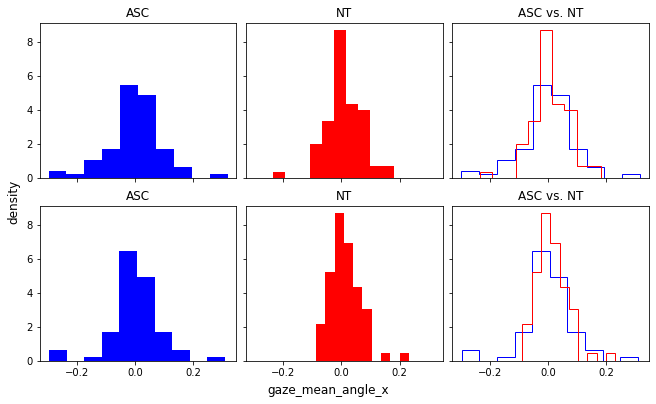

-----------------------------------------------------------------------------------------------------------


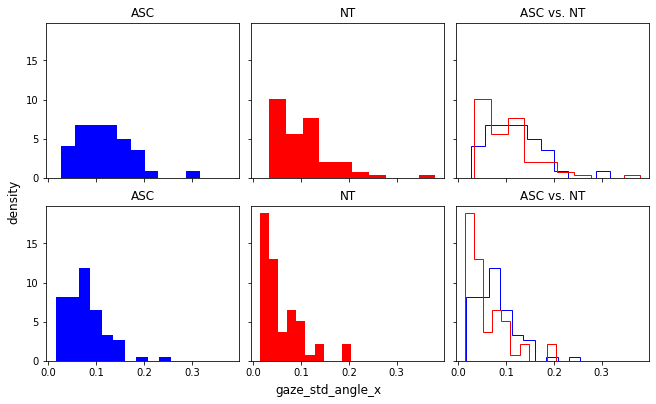

-----------------------------------------------------------------------------------------------------------


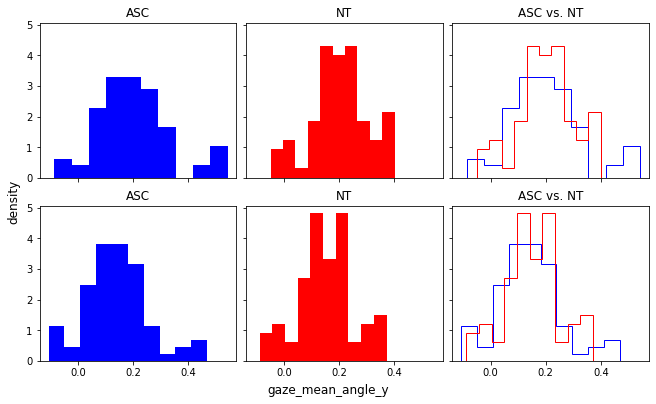

-----------------------------------------------------------------------------------------------------------


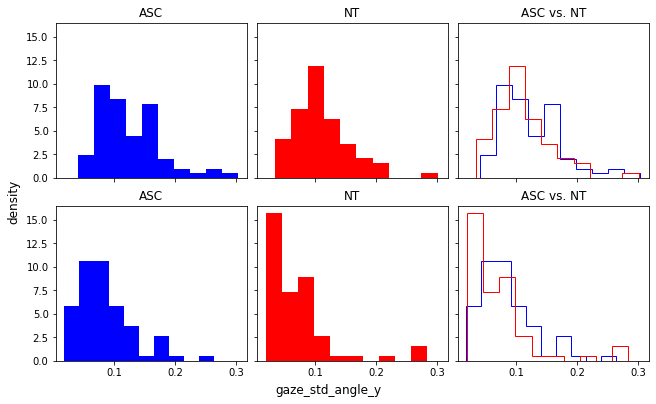

-----------------------------------------------------------------------------------------------------------


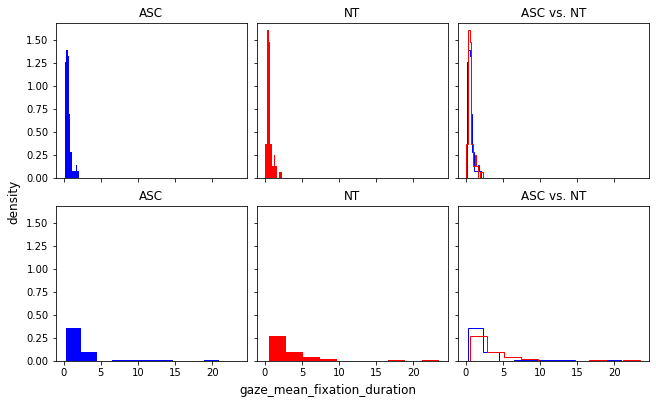

-----------------------------------------------------------------------------------------------------------


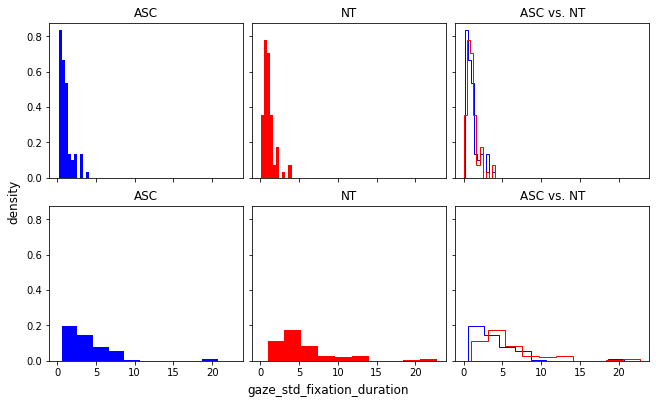

-----------------------------------------------------------------------------------------------------------


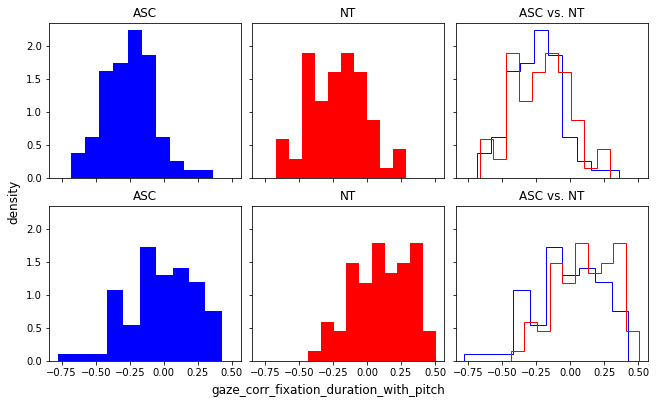

-----------------------------------------------------------------------------------------------------------


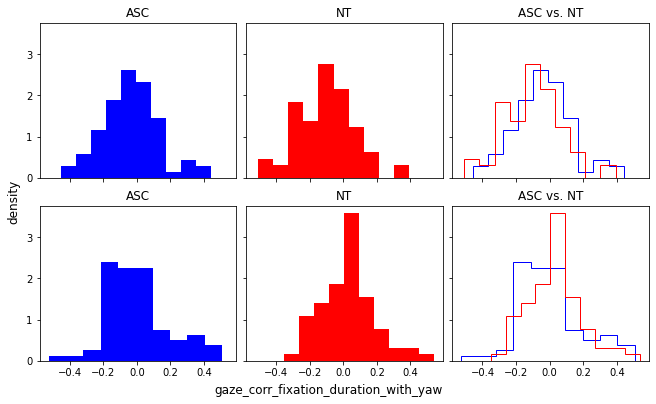

-----------------------------------------------------------------------------------------------------------


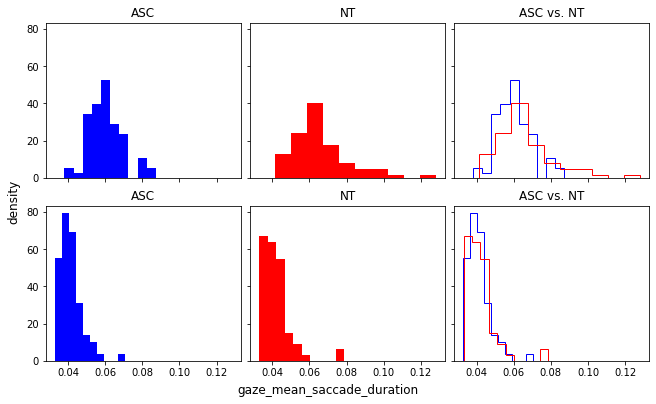

-----------------------------------------------------------------------------------------------------------


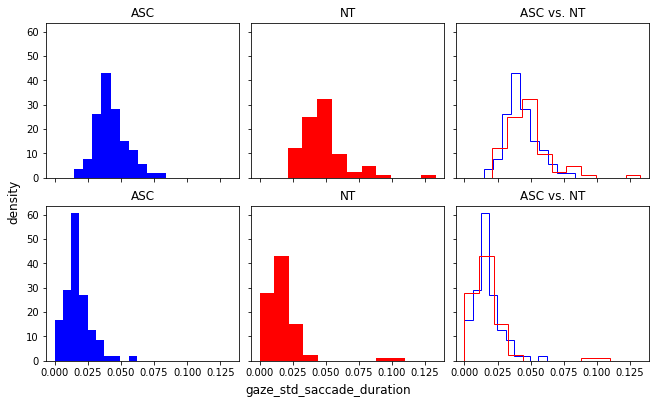

-----------------------------------------------------------------------------------------------------------


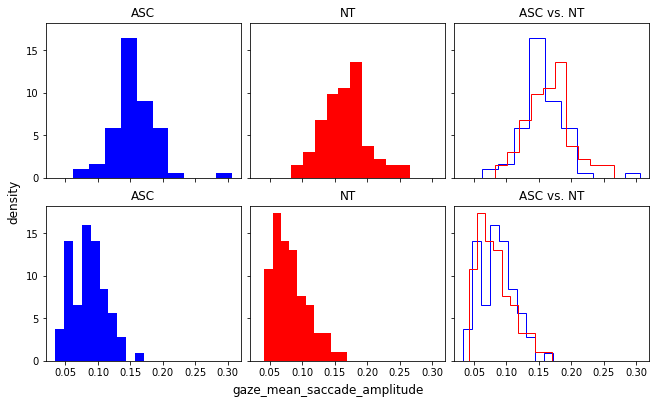

-----------------------------------------------------------------------------------------------------------


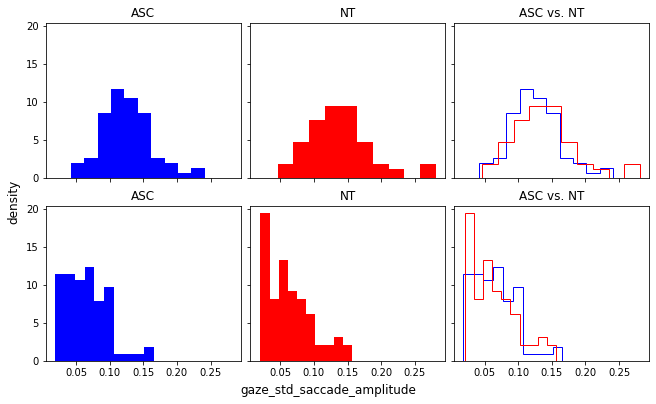

-----------------------------------------------------------------------------------------------------------


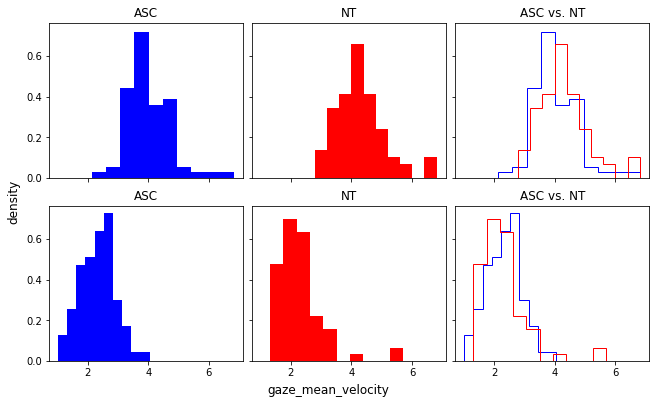

-----------------------------------------------------------------------------------------------------------


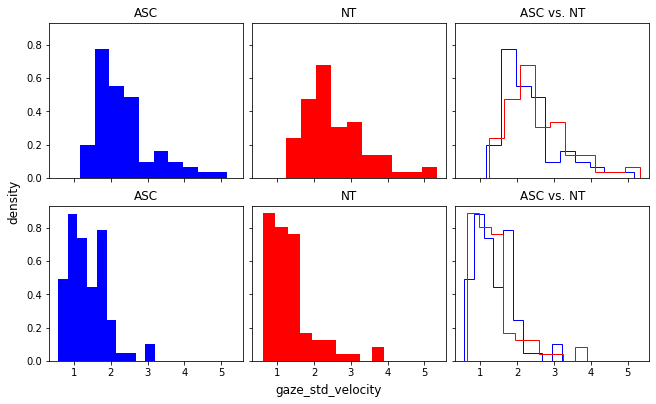

-----------------------------------------------------------------------------------------------------------


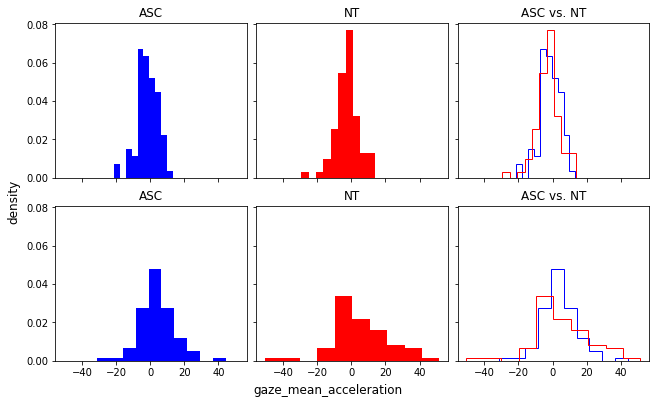

-----------------------------------------------------------------------------------------------------------


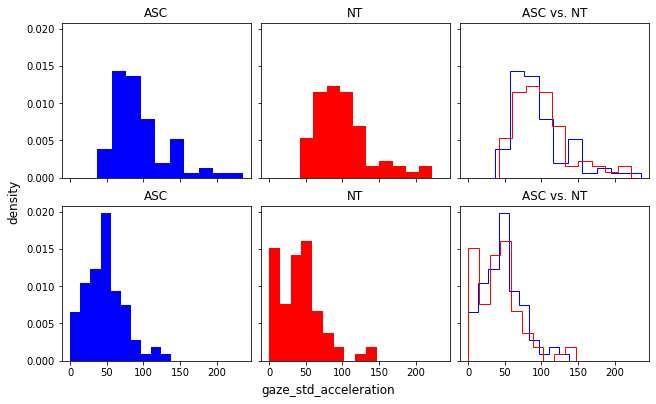

In [2]:
#
# Plot Histograms for each gaze feature (every plot covers both gaze estimation methods)
#
    
print('\n\n\033[1mUpper 3 plots: L2CS-Net\nLower 3 plots: MCGaze\033[0m')
    
# gaze_features['L2CS-Net']['ASC'], gaze_features['L2CS-Net']['NT'], gaze_features['MCGaze']['ASC'] and
# gaze_features['MCGaze']['NT'] all contain the same features.
for feature in gaze_features['L2CS-Net']['ASC']:

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, constrained_layout=True, sharex='all', sharey='all')
    fig.set_figwidth(9)
    fig.set_figheight(5.5)
    fig.supxlabel(feature)
    fig.supylabel('density')

    ax1.set_title('ASC')
    ax1.hist(gaze_features['L2CS-Net']['ASC'][feature], density=True, color='b')

    ax2.set_title('NT')
    ax2.hist(gaze_features['L2CS-Net']['NT'][feature], density=True, color='r')

    ax3.set_title('ASC vs. NT')
    ax3.hist(gaze_features['L2CS-Net']['ASC'][feature], density=True, histtype='step', color='b')
    ax3.hist(gaze_features['L2CS-Net']['NT'][feature], density=True, histtype='step', color='r')


    ax4.set_title('ASC')
    ax4.hist(gaze_features['MCGaze']['ASC'][feature], density=True, color='b')

    ax5.set_title('NT')
    ax5.hist(gaze_features['MCGaze']['NT'][feature], density=True, color='r')

    ax6.set_title('ASC vs. NT')
    ax6.hist(gaze_features['MCGaze']['ASC'][feature], density=True, histtype='step', color='b')
    ax6.hist(gaze_features['MCGaze']['NT'][feature], density=True, histtype='step', color='r')


    plt.show()

    if count_separator_lines_printed + 1 < len(gaze_features['L2CS-Net']['ASC']):        
        print('-----------------------------------------------------------------------------------------------------------')
    count_separator_lines_printed += 1

In [3]:
#
# Conduct the t-tests (for all genders and also separately for male and female)
#

# video_names[i] must hold the name of the video to which feature_values[i] belongs.
def filter_feature_values_by_gender(feature_values, video_names, gender):
    
    filtered_feature_values = []
    
    video_ids_by_gender = {
        'female': [],
        'male': [],
        'diverse': []
    }
    
    for filename in ['VideoIdToGenderMap_1.csv', 'VideoIdToGenderMap_2.csv', 'VideoIdToGenderMap_3.csv', 'VideoIdToGenderMap_4.csv']:
        with open(filename) as csv_file:
            
            file_content = None
            
            if filename == 'VideoIdToGenderMap_3.csv':
                file_content = list(csv.DictReader(csv_file, delimiter=';'))
            else:
                file_content = list(csv.DictReader(csv_file, delimiter=','))
                
            for row in file_content:
                
                # .strip() is necessary as some ids have whitespaces in the file.
                video_id = row['id'].strip()
                
                
                # Find out how many videos with participants of diverse gender there are
                # (necessary for interpretation of the findings). However, for this you need to call
                # this method with all possible parameter combinations and then filter out
                # distinct videos.
                #if row['gender'] == '3.0' or row['gender'] == '3' or row['gender'] == 'diverse':
                #    print('video with diverse participant:', video_id)
                
                
                # test if duplicate
                if (video_id in video_ids_by_gender['female']) or (video_id in video_ids_by_gender['male']):
                    
                    # Some video ids are to be found multiple times in the gender mapping files.
                    # They are stored in the list below. These videos were checked for contradictions.
                    # In some cases, e.g. id 04-012 these values did contradict, but those cases
                    # get handled further down below.
                    ids_that_occur_multiple_times = [
                        '01-008', '01-027', '01-015', '04-015', '04-012',
                        '04-020', '04-051', '04-017', '04-051', '04-051',
                        '04-048', '04-064', '04-077', '02-037', '91-017',
                        '00-000', '94-006', '91-019', '91-025', '94-014',
                        '94-030'
                    ]
                    
                    # For VideoIdToGenderMap_1.csv and VideoIdToGenderMap_2.csv I verified that duplicate videos
                    # (stored in ids_that_occur_multiple_times) do not have contradictory gender information inside
                    # these two gender mapping files. However, when I realized that 12 videos are missing in these
                    # two files and were given yet another file that contains so many duplicates I didn't
                    # bother to check the duplicates that this third file adds for contradictions. However,
                    # since this third file doesn't contain garbage like the other two files (e.g. "-9" as gender)
                    # the manual verification shouldn't be necessary.
                    # EDIT: After I used 3 files I noticed that still some video ids were missing. This is where the
                    # fourth file comes into play. This file doesn't come with any duplicates, because it is handmade.
                    if filename != 'VideoIdToGenderMap_3.csv' and filename != 'VideoIdToGenderMap_4.csv':
                        if video_id not in ids_that_occur_multiple_times:
                            print('ERROR: The video id ' + video_id + ' occurs multiple times in the gender mapping files!')
                            return None
                else:
                    if row['gender'] != '-9':
                        
                        if row['gender'] == '1.0' or row['gender'] == '1' or row['gender'] == 'female':
                            video_ids_by_gender['female'].append(video_id)
                        elif row['gender'] == '2.0' or row['gender'] == '2' or row['gender'] == 'male':
                            video_ids_by_gender['male'].append(video_id)
                        elif row['gender'] == '3.0' or row['gender'] == '3' or row['gender'] == 'diverse':
                            video_ids_by_gender['diverse'].append(video_id)
                        else:
                            print('ERROR: unknown gender \"' + row['gender'] + '\" found')
                            return None
    
    for i in range(0, len(video_names)):
        for video_id_of_desired_gender in video_ids_by_gender[gender]:
            # Test for each video name if it contains one of the video ids of desired gender
            # as substring. If yes, append the feature value that belongs to this video to the returned list.
            if video_id_of_desired_gender in video_names[i]:
                #print('Appended feature values of video with id ' + video_names[i])
                filtered_feature_values.append(feature_values[i])
                break
                
    
    # The gender mapping files were missing some videos (now not anymore). This list helped to find out
    # which are missing.
    # set(video_names) - set(video_names_found_in_gender_mapping_files)
    # is the set that contains all specified videos that couldn't be found in the mapping files.
    video_names_found_in_gender_mapping_files = []
    
    # This loop serves the sole purpose of finding out which video ids are missing in the
    # gender mapping files.
    for i in range(0, len(video_names)):
        for g in ['female', 'male', 'diverse']:
            for video_id_of_desired_gender in video_ids_by_gender[g]:
                # Test for each video name if it contains one of the video ids of desired gender
                # as substring. If yes, append the feature value that belongs to this video to the returned list.
                if video_id_of_desired_gender in video_names[i]:
                    video_names_found_in_gender_mapping_files.append(video_names[i])
                    break
    
    specified_videos_that_could_not_be_found_in_gender_mapping_files = list(set(video_names) - set(video_names_found_in_gender_mapping_files))
    #print("\nSpecified videos that couldn't be found in gender mapping files (" + str(len(specified_videos_that_could_not_be_found_in_gender_mapping_files)) + ' in total):')
    #for video in specified_videos_that_could_not_be_found_in_gender_mapping_files:
    #    print(video)
    
                    
    return filtered_feature_values


# Only test the features where the literature suggests that it might be linked to ASC, hence the postfix
# "_feature_of_interest". If I were to just test all the features error correction would substantially
# increase false negative rate.
# Valid dictionary values are 'two-sided', 'less' and 'greater' (used as parameter for scipy.stats.ttest_ind)
alternative_hypothesis_by_feature_of_interest = {
    'gaze_std_angle_x': 'greater',
    'gaze_mean_angle_y': 'greater',
    'gaze_mean_fixation_duration': 'less',
    'gaze_corr_fixation_duration_with_pitch': 'greater',
    'gaze_mean_saccade_duration': 'greater',
    'gaze_mean_velocity': 'less'
}
count_t_tests = len(methods) * len(alternative_hypothesis_by_feature_of_interest)
# alpha after Bonferroni correction
alpha_corrected = round(0.05/count_t_tests, 4)

print('sd_ASC / sd_NT for...')

# gaze_features['L2CS-Net']['ASC'], gaze_features['L2CS-Net']['NT'], gaze_features['MCGaze']['ASC'] and
# gaze_features['MCGaze']['NT'] all contain the same features.
for feature in gaze_features['L2CS-Net']['ASC']:
    for method in methods:

        if feature in alternative_hypothesis_by_feature_of_interest:
            
            sd_ASC = np.std(gaze_features[method]['ASC'][feature])
            sd_NT = np.std(gaze_features[method]['NT'][feature])
            sd_ratio = sd_ASC / sd_NT
            to_be_printed = feature + ' (' + method + '): ' + str(round(sd_ratio, 3))

            # Show that variances are similar enough to be able to calculate the normal t test (otherwise I would need Welch's t-test)
            if 0.5 <= sd_ratio <= 2:
                print(to_be_printed)
            else:
                print(to_be_printed + ' => Variances are NOT similar enough! Program will exit.')
                exit()
    
print(
    "The above shows that all variancs are similar (0.5 <= sd_ASC / sd_NT <= 2.0 as recommended by wikipedia)."
    " Hence, I will use normal t-tests (not Welch's t-tests).\n"
)


p_value_by_feature_and_method = dict()

# gaze_features['L2CS-Net']['ASC'], gaze_features['L2CS-Net']['NT'], gaze_features['MCGaze']['ASC'] and
# gaze_features['MCGaze']['NT'] all contain the same features.
for feature in gaze_features['L2CS-Net']['ASC']:    
    if feature in alternative_hypothesis_by_feature_of_interest:
        p_value_by_feature_and_method[feature] = dict()
        for method in methods:
            
            p_value_by_feature_and_method[feature][method] = dict()
            
            # NOTE: The order of first and second positional argument is important!
            # (unless "alternative" argument is "two-sided")
            test_result_all_genders = stats.ttest_ind(
                gaze_features[method]['ASC'][feature],
                gaze_features[method]['NT'][feature],
                equal_var=True,
                alternative=alternative_hypothesis_by_feature_of_interest[feature]
            )
            
            test_result_female = stats.ttest_ind(
                filter_feature_values_by_gender(gaze_features[method]['ASC'][feature], video_names[method]['ASC'], 'female'),
                filter_feature_values_by_gender(gaze_features[method]['NT'][feature], video_names[method]['NT'], 'female'),
                equal_var=True,
                alternative=alternative_hypothesis_by_feature_of_interest[feature]
            )
            
            test_result_male = stats.ttest_ind(
                filter_feature_values_by_gender(gaze_features[method]['ASC'][feature], video_names[method]['ASC'], 'male'),
                filter_feature_values_by_gender(gaze_features[method]['NT'][feature], video_names[method]['NT'], 'male'),
                equal_var=True,
                alternative=alternative_hypothesis_by_feature_of_interest[feature]
            )            
            
            p_value_by_feature_and_method[feature][method]['all genders'] = round(test_result_all_genders.pvalue, 4)
            #print(feature + ' (' + method + '): p=' + str(p_value_by_feature_and_method[feature][method]))
            p_value_by_feature_and_method[feature][method]['female'] = round(test_result_female.pvalue, 4)
            p_value_by_feature_and_method[feature][method]['male'] = round(test_result_male.pvalue, 4)


for gender in ['all genders', 'female', 'male']:
    if gender == 'all genders':
        print('\np-values in table below are significant if p < ' + str(alpha_corrected) + ' (corrected with Bonferroni).\n')
    else:
        print('\np-values for gender=' + gender + ' in table below are significant if p < ' + str(alpha_corrected) + ' (corrected with Bonferroni).\n')

    tabulate_headers = ['']
    tabulate_rows = []

    for feature in p_value_by_feature_and_method:
        tabulate_row = [feature]

        for method in p_value_by_feature_and_method[feature]:
            tabulate_headers.append(method)

            if p_value_by_feature_and_method[feature][method][gender] < alpha_corrected:
                # print significant effects in bold
                p_value = '\033[1m' + str(p_value_by_feature_and_method[feature][method][gender]) + '\033[0m'
            else:
                p_value = str(p_value_by_feature_and_method[feature][method][gender])
            tabulate_row.append(p_value)

        tabulate_rows.append(tabulate_row)

    print(
        tabulate(
            tabulate_rows,
            headers=tabulate_headers,
            tablefmt='fancy_grid'
        )
    )

sd_ASC / sd_NT for...
gaze_std_angle_x (L2CS-Net): 0.907
gaze_std_angle_x (MCGaze): 0.973
gaze_mean_angle_y (L2CS-Net): 1.23
gaze_mean_angle_y (MCGaze): 1.129
gaze_mean_fixation_duration (L2CS-Net): 0.888
gaze_mean_fixation_duration (MCGaze): 0.847
gaze_corr_fixation_duration_with_pitch (L2CS-Net): 0.897
gaze_corr_fixation_duration_with_pitch (MCGaze): 1.197
gaze_mean_saccade_duration (L2CS-Net): 0.604
gaze_mean_saccade_duration (MCGaze): 0.766
gaze_mean_velocity (L2CS-Net): 0.843
gaze_mean_velocity (MCGaze): 0.753
The above shows that all variancs are similar (0.5 <= sd_ASC / sd_NT <= 2.0 as recommended by wikipedia). Hence, I will use normal t-tests (not Welch's t-tests).


p-values in table below are significant if p < 0.0042 (corrected with Bonferroni).

╒════════════════════════════════════════╤════════════╤══════════╕
│                                        │   L2CS-Net │   MCGaze │
╞════════════════════════════════════════╪════════════╪══════════╡
│ gaze_std_angle_x            

In [4]:
#
# Calculate effect sizes (Cohen's d) for significant effects
#

def calculate_cohens_d(features_ASC, features_NT):
    
    n_ASC = len(features_ASC)
    n_NT = len(features_NT)
    sd_ASC = np.std(features_ASC)
    sd_NT = np.std(features_NT)
            
    pooled_sd = math.sqrt(
        ( (n_ASC-1)*pow(sd_ASC, 2) + (n_NT-1)*pow(sd_NT, 2) ) /
        (n_ASC + n_NT - 2)
    )
    
    return abs(np.mean(features_ASC) - np.mean(features_NT)) / pooled_sd
                
                
for gender in ['all genders', 'female', 'male']:
    
    if gender == 'all genders':
        print("\n\nEffect sizes (Cohen's d, significant ones in bold) for all genders:")
    else:
        print("\n\nEffect sizes (Cohen's d, significant ones in bold) for gender=\"" + gender + "\":")
            
    table_values = []
    
    for i, feature in enumerate(p_value_by_feature_and_method):
        table_values.append([feature])
        for j, method in enumerate(p_value_by_feature_and_method[feature]):
            
            cohens_d = None

            if gender == 'all genders':
                cohens_d = calculate_cohens_d(gaze_features[method]['ASC'][feature], gaze_features[method]['NT'][feature])
            else:
                cohens_d = calculate_cohens_d(
                        filter_feature_values_by_gender(gaze_features[method]['ASC'][feature], video_names[method]['ASC'], gender),
                        filter_feature_values_by_gender(gaze_features[method]['NT'][feature], video_names[method]['NT'], gender)
                    )
                
            
            if p_value_by_feature_and_method[feature][method][gender] < alpha_corrected:
                # print effect size for significant effects bold
                table_values[i].append("\033[1m" + str(round(cohens_d, 3)) + "\033[0m")
            else:
                table_values[i].append(str(round(cohens_d, 3)))
                
    print(
        tabulate(
            table_values,
            headers=['', 'L2CS-Net', 'MCGaze'],
            tablefmt='fancy_grid'
        )
    )



Effect sizes (Cohen's d, significant ones in bold) for all genders:
╒════════════════════════════════════════╤════════════╤══════════╕
│                                        │   L2CS-Net │   MCGaze │
╞════════════════════════════════════════╪════════════╪══════════╡
│ gaze_std_angle_x                       │      0.262 │    0.45  │
├────────────────────────────────────────┼────────────┼──────────┤
│ gaze_mean_angle_y                      │      0.023 │    0.093 │
├────────────────────────────────────────┼────────────┼──────────┤
│ gaze_mean_fixation_duration            │      0.172 │    0.299 │
├────────────────────────────────────────┼────────────┼──────────┤
│ gaze_corr_fixation_duration_with_pitch │      0.21  │    0.548 │
├────────────────────────────────────────┼────────────┼──────────┤
│ gaze_mean_saccade_duration             │      0.428 │    0.074 │
├────────────────────────────────────────┼────────────┼──────────┤
│ gaze_mean_velocity                     │      0.36  │    

In [5]:
#
# There seems to be an effect for gaze_corr_fixation_duration_with_pitch
# into the opposite direction than what was expected. Let's try to interpret
# it by looking at the mean values of each condition:
#

for gender in ['all genders', 'female', 'male']:
    print('\ngender=\"' + gender + '\"')
    
    if gender == 'all genders':
        print('ASC group:', np.mean(gaze_features['MCGaze']['ASC']['gaze_corr_fixation_duration_with_pitch']))
        print('NT group:', np.mean(gaze_features['MCGaze']['NT']['gaze_corr_fixation_duration_with_pitch']))
    else:
        print('ASC group:', np.mean(filter_feature_values_by_gender(gaze_features['MCGaze']['ASC']['gaze_corr_fixation_duration_with_pitch'], video_names['MCGaze']['ASC'], gender)))
        print('NT group:', np.mean(filter_feature_values_by_gender(gaze_features['MCGaze']['NT']['gaze_corr_fixation_duration_with_pitch'], video_names['MCGaze']['NT'], gender)))
print(
    '\nIt seems fixation duration and pitch gaze angle for people with ASC do not correlate. For neurotypicals '
    ' on the other hand downward tilted gaze on average seems to come along with longer fixation durations.'
)


gender="all genders"
ASC group: -0.018502506400334625
NT group: 0.10740107683047478

gender="female"
ASC group: -0.024461553943279844
NT group: 0.09274619883798839

gender="male"
ASC group: -0.01134676062873653
NT group: 0.12472047809432235

It seems fixation duration and pitch gaze angle for people with ASC do not correlate. For neurotypicals  on the other hand downward tilted gaze on average seems to come along with longer fixation durations.
